<a href="https://colab.research.google.com/github/AisIzmailova/AisIzmailova_Practice_Notebooks/blob/master/DL_Convolutional_Neural_Network_Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multi-class Classification

1. Become one with data
2. Preprocess the data
3. Create a baseline model
4. Fit the baseline model
5. Evaluate the baseline model
6. Adjust hyperparameters to improve the model
7. Repeat until satisfied

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

##1.Become one with data

In [6]:
#Download data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-12-23 05:20:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.0.91, 172.217.12.27, 2607:f8b0:4025:803::201b, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.0.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  48.9MB/s    in 6.0s    

2023-12-23 05:21:04 (82.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [7]:
#Unzip the data
import zipfile
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [8]:
import os
#Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data/test.
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi.
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice.
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza.
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream.
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings.
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon.
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry.
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen.
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak.
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger.
There are 10 directories and 0 ima

In [5]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Dec 23 02:42 .
drwxr-xr-x  1 root root 4096 Dec 23 02:42 ..
drwxr-xr-x 12 root root 4096 Dec 23 02:42 test
drwxr-xr-x 12 root root 4096 Dec 23 02:42 train


In [11]:
#Set up train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [12]:
#Get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [8]:
def view_random_image(target_dir, target_class):

  #Setup the target directory
  target_folder = target_dir+target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape:  {img.shape}")
  return img

['40858.jpg']
Image shape:  (512, 512, 3)


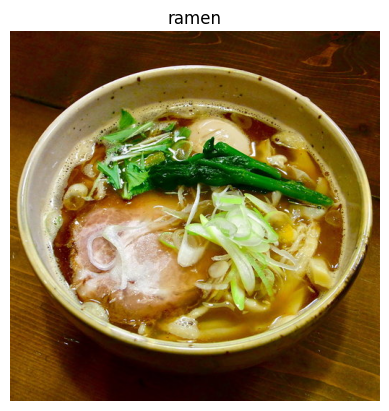

In [9]:
#Visualize data
import random
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

##2.Preprocess data

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Preprocess data (normalize pixel values)
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                            batch_size=32,
                                            target_size=(224,224),
                                            class_mode="sparse",
                                            seed=42)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="sparse",
                                               seed=42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [11]:
len(train_data)

235

##3. Create a baseline model

In [12]:
#Create the model

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3),
    tf.keras.layers.Activation(tf.nn.relu), #alternative way to set activations
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

#Compile the model
model_1.compile(
    loss =tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

##4.Fit the model

In [23]:
#Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 34s 143ms/step - loss: 0.2355 - accuracy: 0.9324 - val_loss: 4.1640 - val_accuracy: 0.2840
Epoch 2/5
235/235 [==============================] - 31s 131ms/step - loss: 0.1069 - accuracy: 0.9704 - val_loss: 5.3372 - val_accuracy: 0.2752
Epoch 3/5
235/235 [==============================] - 44s 189ms/step - loss: 0.0613 - accuracy: 0.9835 - val_loss: 5.5704 - val_accuracy: 0.2680
Epoch 4/5
235/235 [==============================] - 32s 134ms/step - loss: 0.0355 - accuracy: 0.9917 - val_loss: 6.0473 - val_accuracy: 0.2644
Epoch 5/5
235/235 [==============================] - 33s 141ms/step - loss: 0.0469 - accuracy: 0.9869 - val_loss: 6.9888 - val_accuracy: 0.2664


##5.Evaluate the model

In [14]:
model_1.evaluate(test_data)

79/79 [==============================] - 8s 101ms/step - loss: 3.0149 - accuracy: 0.2964


[3.014904737472534, 0.2964000105857849]

In [38]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for traiing anyd validation metrics.
  """

  loss= history.history["loss"]
  val_loss= history.history["val_loss"]
  accuracy= history.history["accuracy"]
  val_accuracy= history.history["val_accuracy"]
  epochs =range(len(history.history["loss"]))

  #Plot the loss
  plt.plot(epochs,loss,  label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()
  #Plot the accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="accuracy")
  plt.plot(epochs, val_accuracy,  label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

<Axes: title={'center': 'Model data'}>

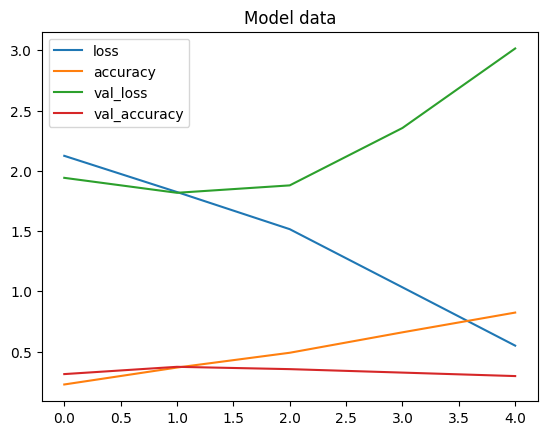

In [22]:
import pandas as pd
pd.DataFrame(history_1.history).plot(title="Model data")

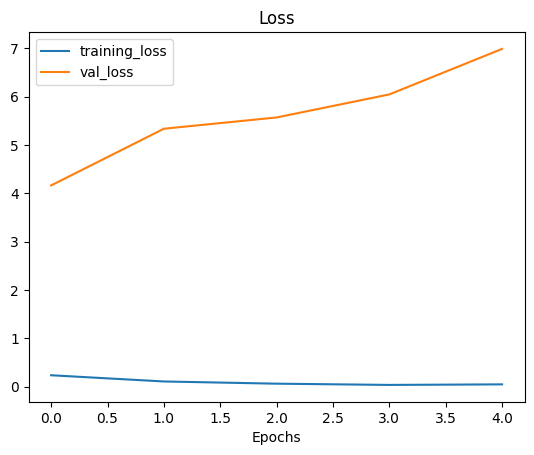

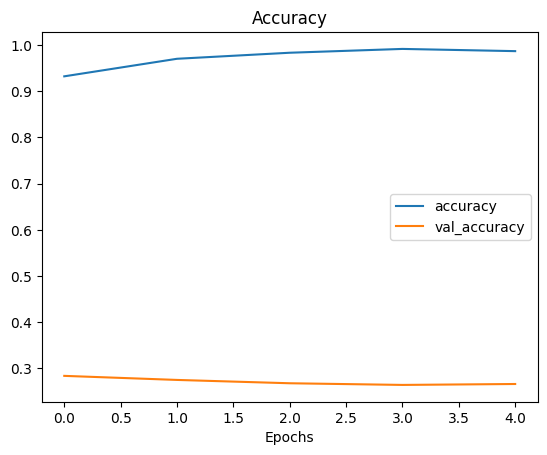

In [40]:
plot_loss_curves(history_1)

The model is overfirring since the validation loss is increasing.

##6.Adjust parameters to improve the model

To fix overfitting, we can try:
* **Get more data** - having more data gives model more opportunity to learn diverse patterns.
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated, one way to simplify the model is to reduce the # of layers or reduce the # of hidden units in layers.
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it without altering the original data.
* **Use transfer learning** - transfer learning leverages the patterns another model has learned in similar data to your own and allows you to use those patterns on your own dataset.

Let's first try to simplify the model by removing some of the Conv2D layers.

In [41]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, None, None, 10)    280       
                                                                 
 activation (Activation)     (None, None, None, 10)    0         
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d (MaxPooling2  (None, None, None, 10)    0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 conv2d_3 (Conv2D)           (None, None, None, 10)    910       
                                                        

In [45]:
#Create the model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

#Compile the model
model_2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

#Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 46s 189ms/step - loss: 2.1374 - accuracy: 0.2380 - val_loss: 1.9036 - val_accuracy: 0.3444
Epoch 2/5
235/235 [==============================] - 32s 135ms/step - loss: 1.7403 - accuracy: 0.4143 - val_loss: 1.9937 - val_accuracy: 0.3136
Epoch 3/5
235/235 [==============================] - 27s 116ms/step - loss: 1.3726 - accuracy: 0.5509 - val_loss: 1.8967 - val_accuracy: 0.3572
Epoch 4/5
235/235 [==============================] - 31s 132ms/step - loss: 0.9198 - accuracy: 0.7100 - val_loss: 2.0655 - val_accuracy: 0.3408
Epoch 5/5
235/235 [==============================] - 28s 120ms/step - loss: 0.5067 - accuracy: 0.8587 - val_loss: 2.6098 - val_accuracy: 0.3192


In [46]:
#Evaluate the model
model_2.evaluate(test_data)

79/79 [==============================] - 7s 92ms/step - loss: 2.6098 - accuracy: 0.3192


[2.609814167022705, 0.3192000091075897]

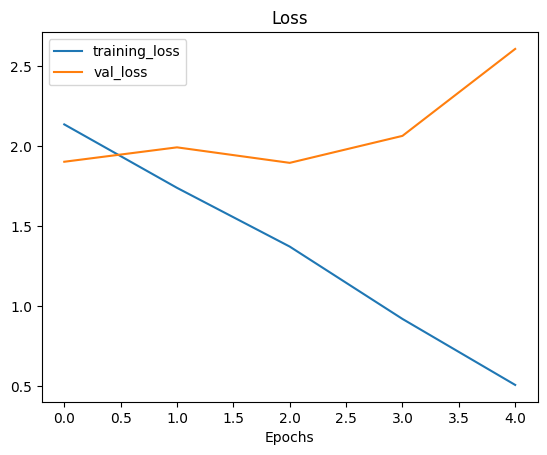

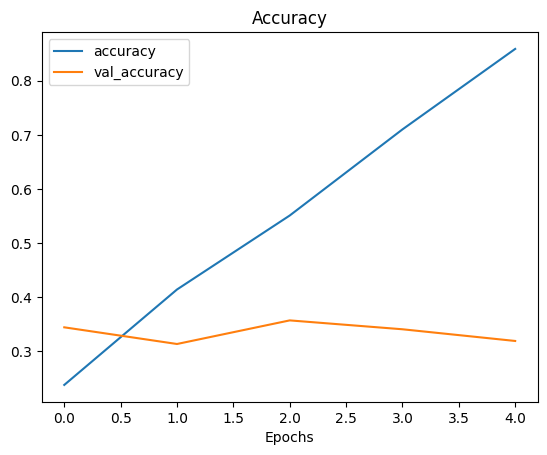

In [47]:
plot_loss_curves(history_2)

The model did not improve when convolutional layers were removed. Let's try augment the data.

In [14]:
#Create ImageDataGenerator training instance with augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, #rotates the image
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

In [15]:
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="sparse",
                                                                 shuffle=True)

Found 7500 images belonging to 10 classes.


In [16]:
#Create the model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation="softmax")
])

#Compile the model
model_3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

#Fit the model
history_3 = model_3.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 347s 1s/step - loss: 2.2818 - accuracy: 0.1581 - val_loss: 2.1471 - val_accuracy: 0.2216
Epoch 2/5
235/235 [==============================] - 320s 1s/step - loss: 2.1270 - accuracy: 0.2372 - val_loss: 1.9954 - val_accuracy: 0.2872
Epoch 3/5
235/235 [==============================] - 322s 1s/step - loss: 2.0811 - accuracy: 0.2576 - val_loss: 1.9583 - val_accuracy: 0.3020
Epoch 4/5
235/235 [==============================] - 317s 1s/step - loss: 2.0599 - accuracy: 0.2821 - val_loss: 1.9330 - val_accuracy: 0.3392
Epoch 5/5
235/235 [==============================] - 310s 1s/step - loss: 2.0208 - accuracy: 0.2873 - val_loss: 1.9120 - val_accuracy: 0.3292


In [59]:
#Evaluate the model
model_3.evaluate(test_data)

79/79 [==============================] - 6s 81ms/step - loss: 1.8442 - accuracy: 0.3548


[1.8442257642745972, 0.3547999858856201]

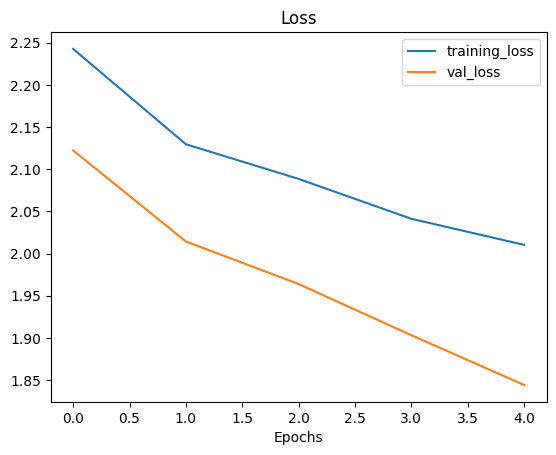

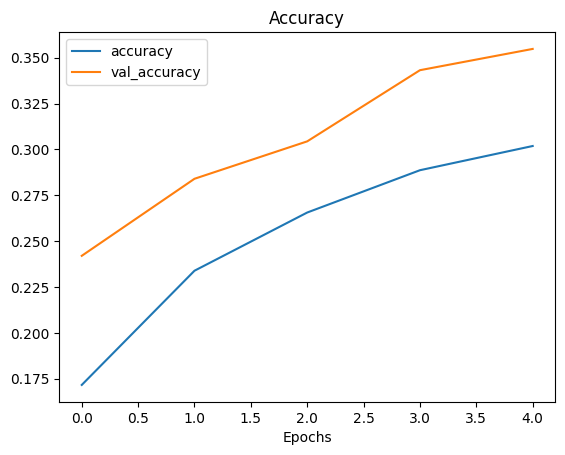

In [60]:
plot_loss_curves(history_3)

##Making predictions with our own images

In [65]:
def load_and_prep_image(filename,img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channels).
  """
  #Read the image
  img = tf.io.read_file(filename)
  #Decode the read file into a tensor
  img = tf.image.decode_image(img)
  #Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  #Rescale the image (get all values btwn 0 and 1)
  img=img/255.
  return img

In [97]:
def pred_and_plot(model, filename, class_names = class_names):
  """
  Imports an image located at filename, makes prediction with the model and plots the image with the predicted class the title.
  """

  #Import the target image and preprocess it
  img = load_and_prep_image(filename)

  #Make prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  print(pred[0])
  print(tf.argmax(pred[0]))
  print(class_names[tf.argmax(pred[0])])
  #Add logic for multiclass classification
  if len(pred[0])>1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    #Get the predicted class for binary classification
    pred_class = class_names[int(tf.round(pred))]

  #Plot the image
  plt.imshow(img)
  plt.title(f"{pred_class}")
  plt.axis(False)


In [80]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

1/1 [==============================] - 0s 28ms/step
[0.08016707 0.02203648 0.50282127 0.13961545 0.04812302 0.00465912
 0.12909257 0.03877705 0.02699544 0.00771256]
tf.Tensor(2, shape=(), dtype=int64)
fried_rice


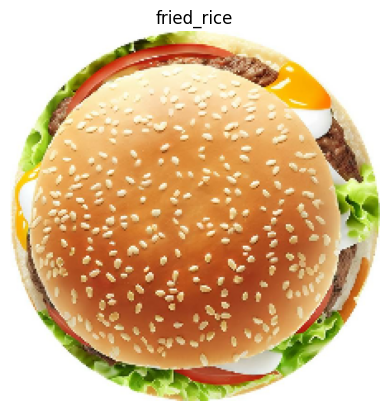

In [98]:
pred_and_plot(model_3,"/content/hamburger_image.jpg")

1/1 [==============================] - 0s 17ms/step
[0.03103406 0.03331147 0.13611168 0.1691162  0.05864846 0.11367358
 0.02669352 0.0183649  0.24902345 0.1640226 ]
tf.Tensor(8, shape=(), dtype=int64)
steak


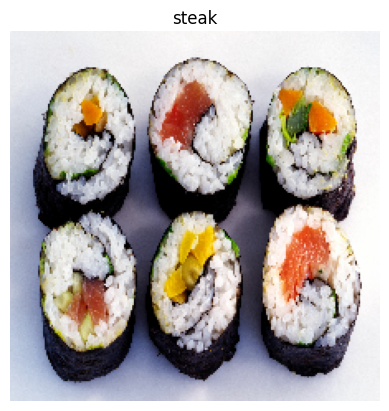

In [99]:
pred_and_plot(model_3,"/content/Sushi_image.jpg")

##Save our model

In [17]:
model_3.save("saved_model_multiclass_classification")

##Load our model

In [19]:
loaded_model=tf.keras.models.load_model("saved_model_multiclass_classification")

In [20]:
loaded_model.evaluate(test_data)

79/79 [==============================] - 28s 352ms/step - loss: 1.9120 - accuracy: 0.3292


[1.9120023250579834, 0.32919999957084656]